In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

from diffusers import LatentConsistencyModelPipeline
import torch

In [ ]:
pipe = LatentConsistencyModelPipeline.from_pretrained(
    "SimianLuo/LCM_Dreamshaper_v7", 
    # custom_pipeline="latent_consistency_txt2img", 
    # custom_revision="main", 
    # revision="fb9c5d", 
    local_files_only=True
)

# To save GPU memory, torch.float16 can be used, but it may compromise image quality.
pipe.to(torch_device="cuda", torch_dtype=torch.float32);

In [4]:
prompt = "space survival adventure, 2D side scrolling, in a dark castle, lost inside city ruins, sun rays through trees, 2D side scrolling video game, downtown at the beautiful park, compelled to explore the mysteries that lie within the shadowy depths of this eldritch setting in steampunk style., relax and enjoy a time of peace and tranquility, refreshing and beautiful, corrupted, in the style of depiction of rural life, swimming in beer, lying supine in solarpunk rebirth, the bechers' typologies, --chaos 0, 2d, eye - protection, a version 5.1, while an eagle soars majestically in the backdrop"

# Can be set to 1~50 steps. LCM support fast inference even <= 4 steps. Recommend: 1~8 steps.
num_inference_steps = 4 

images = pipe(
    prompt=prompt, 
    num_inference_steps=num_inference_steps, 
    guidance_scale=8.0, 
    output_type="pil",
    # generator=torch.Generator(device="cuda").manual_seed(seed), 
).images
images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (132 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", in the style of depiction of rural life, swimming in beer, lying supine in solarpunk rebirth, the bechers'typologies, -- chaos 0, 2 d, eye - protection, a version 5. 1, while an eagle soars majestically in the backdrop"]


  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 1.11 s, sys: 36.6 ms, total: 1.15 s
Wall time: 462 ms


In [3]:
import os

import torch
from diffusers import DiffusionPipeline

import pandas as pd

from tqdm.auto import tqdm

In [4]:
# model_id = 'SimianLuo/LCM_Dreamshaper_v7'
# target_dir = './tmp/dreamshaper/v7-lcm/'

# model_id = 'Lykon/dreamshaper-7'
# target_dir = './tmp/dreamshaper/v7/'

model_id = 'Lykon/dreamshaper-8-lcm'
target_dir = './tmp/dreamshaper/v8-lcm/'

# model_id = 'Lykon/dreamshaper-8'
# target_dir = './tmp/dreamshaper/v8/'

pipe = DiffusionPipeline.from_pretrained(
    model_id, local_files_only=True,
    # torch_dtype=torch.float16, variant="fp16"
)
pipe.to("cuda");

pipe.set_progress_bar_config(leave=False)
pipe.set_progress_bar_config(disable=True)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/xhxie/snap/kk-digital/kcg-ml-image-pipeline/venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
prompts = pd.read_csv('./environmental_high-score.tsv', sep='\t')

In [ ]:
with torch.no_grad():
    
    image = pipe(
        prompt='waifu', 

        # # v7-lcm
        # num_inference_steps=4, 
        # guidance_scale=8.0, 
        # lcm_origin_steps=50,

        # # v7/v8
        # num_inference_steps=25, 

        # v8-lcm
        num_inference_steps=15, 
        guidance_scale=2.0, 
        
        output_type="pil",
        generator=torch.Generator(device="cuda").manual_seed(info.seed), 
    ).images[0]

In [ ]:
for info in tqdm(prompts.itertuples(), total=prompts.shape[0], leave=False):
    
    with torch.no_grad():
        
        image = pipe(
            prompt=info.positive_prompt, 

            # # v7-lcm
            # num_inference_steps=4, 
            # guidance_scale=8.0, 
            # lcm_origin_steps=50,

            # # v7/v8
            # num_inference_steps=25, 

            # v8-lcm
            num_inference_steps=15, 
            guidance_scale=2.0, 
            
            output_type="pil",
            generator=torch.Generator(device="cuda").manual_seed(info.seed), 
        ).images[0]

        image.save(os.path.join(target_dir, os.path.split(info.file_path)[-1]))

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../kcg-ml-image-pipeline/'))
from utility.minio.cmd import connect_to_minio_client

In [2]:
MINIO_ADDRESS = "123.176.98.90:9000"
# MINIO_ADDRESS = "192.168.3.5:9000"
access_key = "GXvqLWtthELCaROPITOG"
secret_key = "DmlKgey5u0DnMHP30Vg7rkLT0NNbNIGaM8IwPckD"
bucket_name = 'datasets'

client = connect_to_minio_client(MINIO_ADDRESS, access_key, secret_key)

Connecting to minio client...
Successfully connected to minio client...


In [10]:
target_dir = './tmp/dreamshaper/sd-1.5/'

for info in tqdm(prompts.itertuples(), total=prompts.shape[0]):
    # client.fget_object(bucket_name, info.file_path, os.path.join(target_dir, os.path.split(info.file_path)[-1]))
    os.system(f'cp ../kcg-ml-image-pipeline/output/dataset/image/environmental/{info.file_path} {target_dir}')

  0%|          | 0/100 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", in the style of depiction of rural life, swimming in beer, lying supine in solarpunk rebirth, the bechers'typologies, -- chaos 0, 2 d, eye - protection, a version 5. 1, while an eagle soars majestically in the backdrop"]


  0%|          | 0/20 [00:00<?, ?it/s]

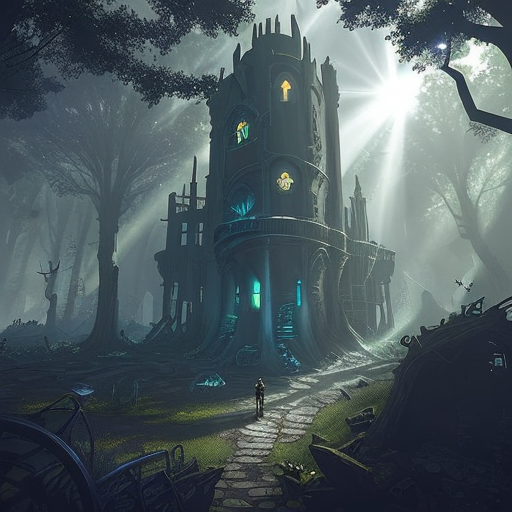

In [6]:
# prompt = "2d tiled pixel game, scrolling view, 2D environmental, post apocalyptic, side scrolling, the background of the huge light engine, large ferns, boss fight, a magnificent nightscape featuring a single avali"
prompt = "space survival adventure, 2D side scrolling, in a dark castle, lost inside city ruins, sun rays through trees, 2D side scrolling video game, downtown at the beautiful park, compelled to explore the mysteries that lie within the shadowy depths of this eldritch setting in steampunk style., relax and enjoy a time of peace and tranquility, refreshing and beautiful, corrupted, in the style of depiction of rural life, swimming in beer, lying supine in solarpunk rebirth, the bechers' typologies, --chaos 0, 2d, eye - protection, a version 5.1, while an eagle soars majestically in the backdrop"

image = pipe(prompt=prompt, num_inference_steps=20, guidance_scale=7.5).images[0]

image

In [ ]:
import torch
from diffusers import LCMScheduler, AutoPipelineForText2Image

model_id = "runwayml/stable-diffusion-v1-5"
adapter_id = "latent-consistency/lcm-lora-sdv1-5"
adapter_weight_name = "pytorch_lora_weights.safetensors"

pipe = AutoPipelineForText2Image.from_pretrained(
    model_id, torch_dtype=torch.float16, variant="fp16",
    local_files_only=True
)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config, local_files_only=True)
pipe.to("cuda");

# load and fuse lcm lora
pipe.load_lora_weights(adapter_id, weight_name=adapter_weight_name, local_files_only=True)
pipe.fuse_lora();

In [ ]:
prompt = "Self-portrait oil painting, a beautiful cyborg with golden hair, 8k"

# disable guidance_scale by passing 0
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0).images[0]

image

In [7]:
import pandas as pd
df = pd.read_csv('./environmental-sigma_score_2_plus.csv')

target_dir = './tmp/kandinsky_and_lcm_generation_demo/'
os.makedirs(target_dir, exist_ok=True)

In [ ]:
os.makedirs(os.path.join(target_dir, 'lcm_pos_only'), exist_ok=True)
for info in df.itertuples():
    image = pipe(
        prompt=info.positive_prompt, 
        num_inference_steps=25
    ).images[0]
    image.save(os.path.join(target_dir, 'lcm_pos_only', f'{os.path.split(info.file_path)[-1]}.jpg'))

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

from diffusers import StableDiffusionImageVariationPipeline
import torch

In [ ]:
model_path = 'runwayml/stable-diffusion-v1-5'

pipe = StableDiffusionImageVariationPipeline.from_pretrained(
    model_path, local_files_only=True#, torch_dtype=torch.float16, variant="fp16"
)
pipe.to('cuda');

In [3]:
in_steps = list()
def callback(*args):
    in_steps.append(args)

In [4]:
with torch.no_grad():
    
    image = pipe(
        prompt='An astronaut riding a green horse',
        
        callback=callback,
        callback_steps=1
    ).images[0]

/home/xhxie/snap/kk-digital/kcg-ml-image-pipeline/venv/lib/python3.10/site-packages/diffusers/pipelines/latent_consistency_models/pipeline_latent_consistency_text2img.py:698: FutureWarning: `callback` is deprecated and will be removed in version 1.0.0. Passing `callback` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(
/home/xhxie/snap/kk-digital/kcg-ml-image-pipeline/venv/lib/python3.10/site-packages/diffusers/pipelines/latent_consistency_models/pipeline_latent_consistency_text2img.py:704: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/4 [00:00<?, ?it/s]

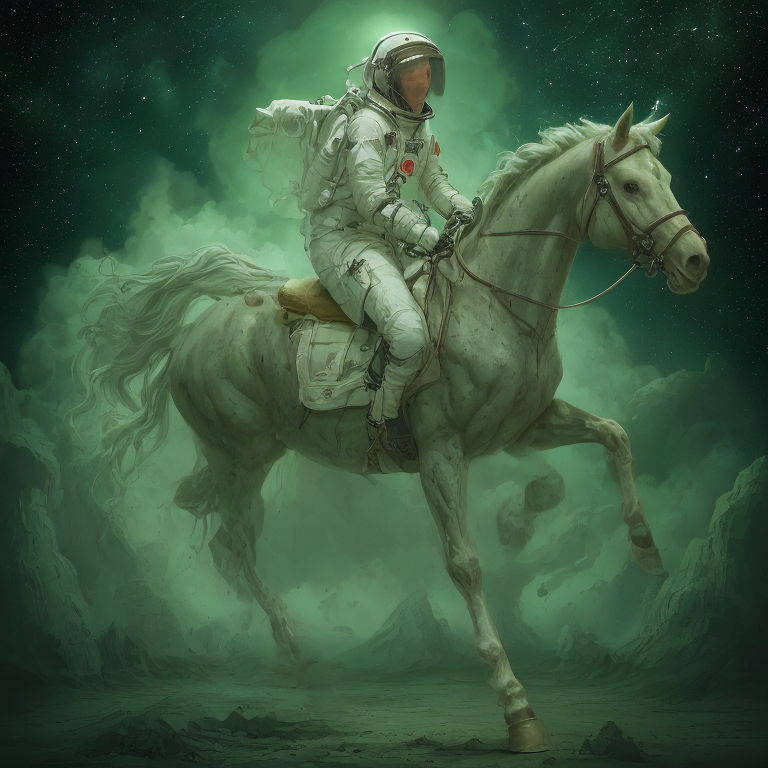

In [5]:
image

In [9]:
latents = in_steps[-2][2]

In [10]:
with torch.no_grad():
    image = pipe.vae.decode(latents / pipe.vae.config.scaling_factor, return_dict=False)[0]
    image = pipe.image_processor.postprocess(image, output_type='pil')

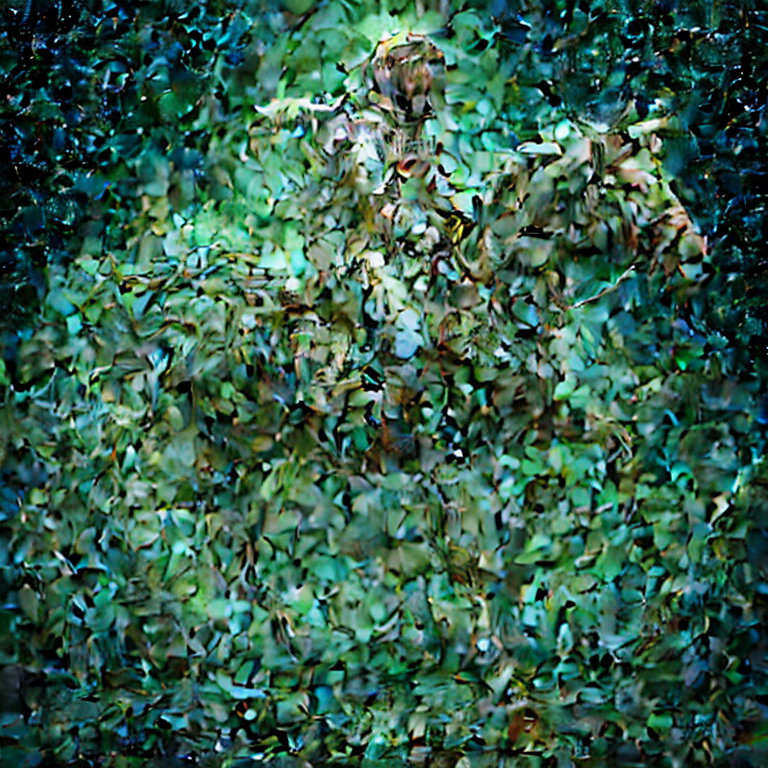

In [11]:
image[0]